Lab 16 Regression analysis

Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

Use this command to create a dataframe with the data provided in the table.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm

In [5]:
student_data = pd.DataFrame(columns = ['StudentID', 'Age', 'Tardies'], data = [[1, 17, 10], [2, 51, 1], [3, 27, 5], [4, 21, 9], [5, 36, 4], [6, 48, 2], [7, 19, 9], [8, 26, 6], [9, 54, 0], [10, 30, 3]])
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

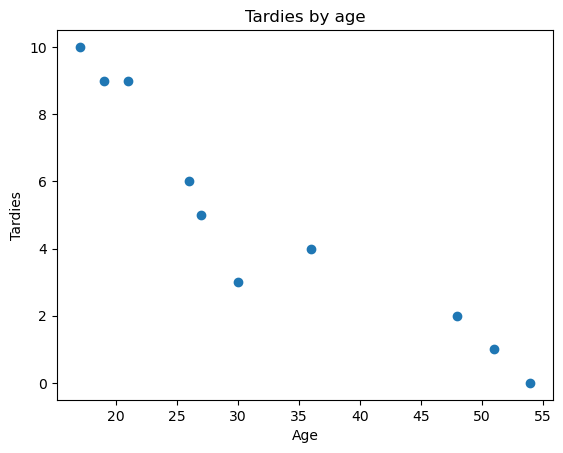

In [3]:
plt.scatter(x = 'Age', y = 'Tardies', data = student_data)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Tardies by age')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

It clearly seems that older people tend to be late less often.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
np.cov(student_data['Age'], student_data['Tardies'])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [7]:
np.corrcoef(student_data['Age'], student_data['Tardies'])

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

In [6]:
student_data[['Age', 'Tardies']].corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


The covariance between age and tardies is very negative. This means that age tend to be higher than average when tardies are lower than average and vice versa. Pearson's correlation is very close to -1, this means that age and tardies are very close to have a linear relationship with negative coefficient.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Plot your regression model on your scatter plot.

In [9]:
slope, intercept, r, p, std_err = stats.linregress(student_data['Age'], student_data['Tardies'])

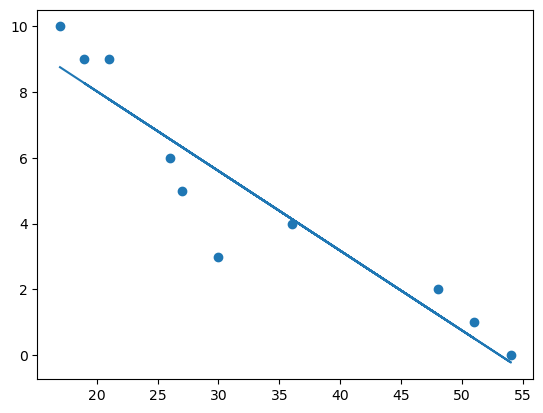

In [10]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.plot(student_data['Age'], slope * student_data['Age'] + intercept)
plt.show()

In [11]:
r

-0.9391626886887123

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

We used linear regression to modelize the data. We have a r-value close to -1, this means that the model is fairly close to reality.

Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [12]:
vehicles = pd.read_csv(r"C:\Users\anato\Documents\IRONHACK\IronFrandre\Courses\vehicles\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [16]:
vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Fuel Barrels/Year, Combined MPG and Fuel Cost/Year are highly correlated with our outcome variable. Cylinders is moderately correlated and Year has no significant correlation. The most important variable is Fuel Barrels/Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
regr = linear_model.LinearRegression()
regr.fit(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']], vehicles['CO2 Emission Grams/Mile'])


LinearRegression()

In [19]:
regr.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [26]:
model = sm.OLS(vehicles['CO2 Emission Grams/Mile'], vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Tue, 15 Nov 2022   Prob (F-statistic):                        0.00
Time:                             15:03:29   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 value is very close to 1, this means that the model is close to reality. The most important variables are Fuel Barrels/Year and Combined MPG that have much larger coefs in absolute value than other variables.

Bonus Challenge: Error Analysis
I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. First, build a dataframe with the data.

In [29]:
party_data = pd.DataFrame(columns = ['X', 'Y'], data = [[1, 1], [3, 2], [4, 4], [6, 4], [8, 5], [9, 7], [11, 8], [14, 13]])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [30]:
slope2, intercept2, r2, p2, std_err2 = stats.linregress(party_data['X'], party_data['Y'])

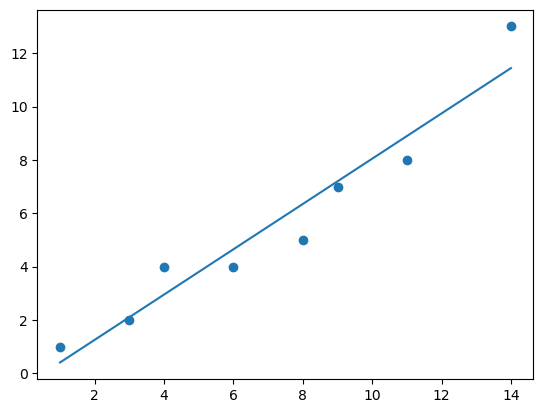

In [32]:
plt.scatter(party_data['X'], party_data['Y'])
plt.plot(party_data['X'], slope2 * party_data['X'] + intercept2)
plt.show()

In [33]:
r2

0.9652303546573691